# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample_NYC_parking_issues.csv", delimiter=";")
df.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,WH,NaN,2004.0,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS),NaN,NaN,NaN
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,BK,NaN,2008.0,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,NaN,0.0,2006.0,-,0.0,NaN,NaN,NaN,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,GY,NaN,2008.0,NaN,0.0,14 4,21-No Parking (street clean),NaN,NaN,NaN
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,MR,NaN,1996.0,NaN,0.0,03-A,20A-No Parking (Non-COM),NaN,NaN,NaN


### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [2]:
df = df.fillna("None")
df.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,WH,None,2004.0,None,0.0,01 4,71A-Insp Sticker Expired (NYS),None,None,None
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,BK,None,2008.0,None,0.0,None,FAILURE TO STOP AT RED LIGHT,None,None,None
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,None,0.0,2006.0,-,0.0,None,None,None,None,None
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,GY,None,2008.0,None,0.0,14 4,21-No Parking (street clean),None,None,None
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,MR,None,1996.0,None,0.0,03-A,20A-No Parking (Non-COM),None,None,None


### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [3]:
df = df[df["Vehicle Year"] != 0]
df = df[df["Vehicle Year"] != "None"]
df = df[df["Vehicle Year"] < 2024]
df["Vehicle Year"] = df["Vehicle Year"].astype("int64")

### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [4]:
borrar = len(df[df["Vehicle Make"] == "None"])
print("Se borraran ",borrar," datos")

df = df[df["Vehicle Make"] != "None"]

Se borraran  24  datos


### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

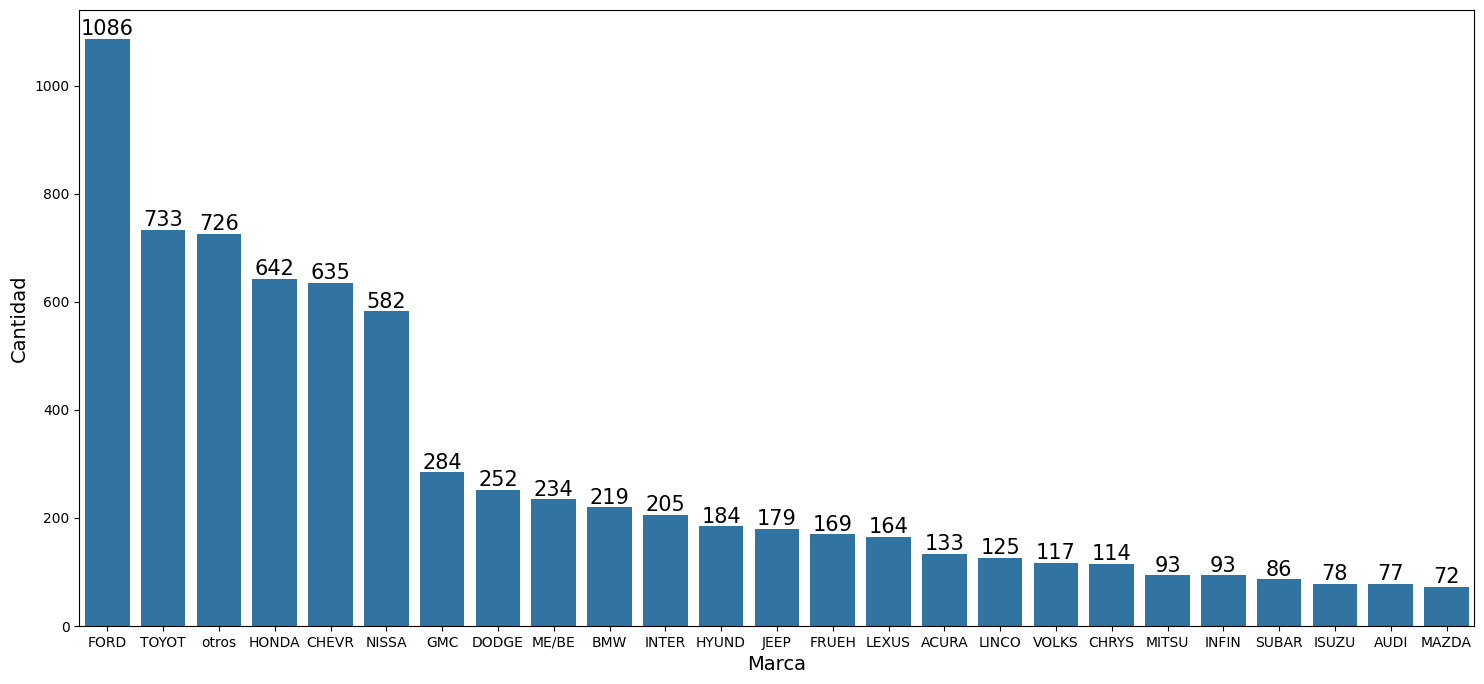

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

grupos = df["Vehicle Make"].value_counts().reset_index()
grupos.columns = ["Vehicle Make", "Count"]

plt.figure(figsize=(18, 8))
ax = sns.barplot(data=grupos, x="Vehicle Make", y="Count")
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

plt.show()

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [8]:
from difflib import get_close_matches

colores = ["WHITE", "GREY", "BLACK", "BLUE", "RED", "TAN", "BROWN", "YELLOW", "GREENLAND", "MAGENTA", "ORANGE", "GREEN", "LIGHT", "PINK", "GOLD", "SILVER", "NONE", "PURPLE"]

def completar_color(color):
    match = get_close_matches(color, colores, n=1, cutoff=0.4)
    return match[0] if match else color

df["Vehicle Color"] = df["Vehicle Color"].apply(completar_color)
df["Vehicle Color"]

0        WHITE
1        BLACK
2         None
3         GREY
4          RED
         ...  
9994       RED
9995     WHITE
9997      GREY
9998    SILVER
9999     BLACK
Name: Vehicle Color, Length: 7282, dtype: object

### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

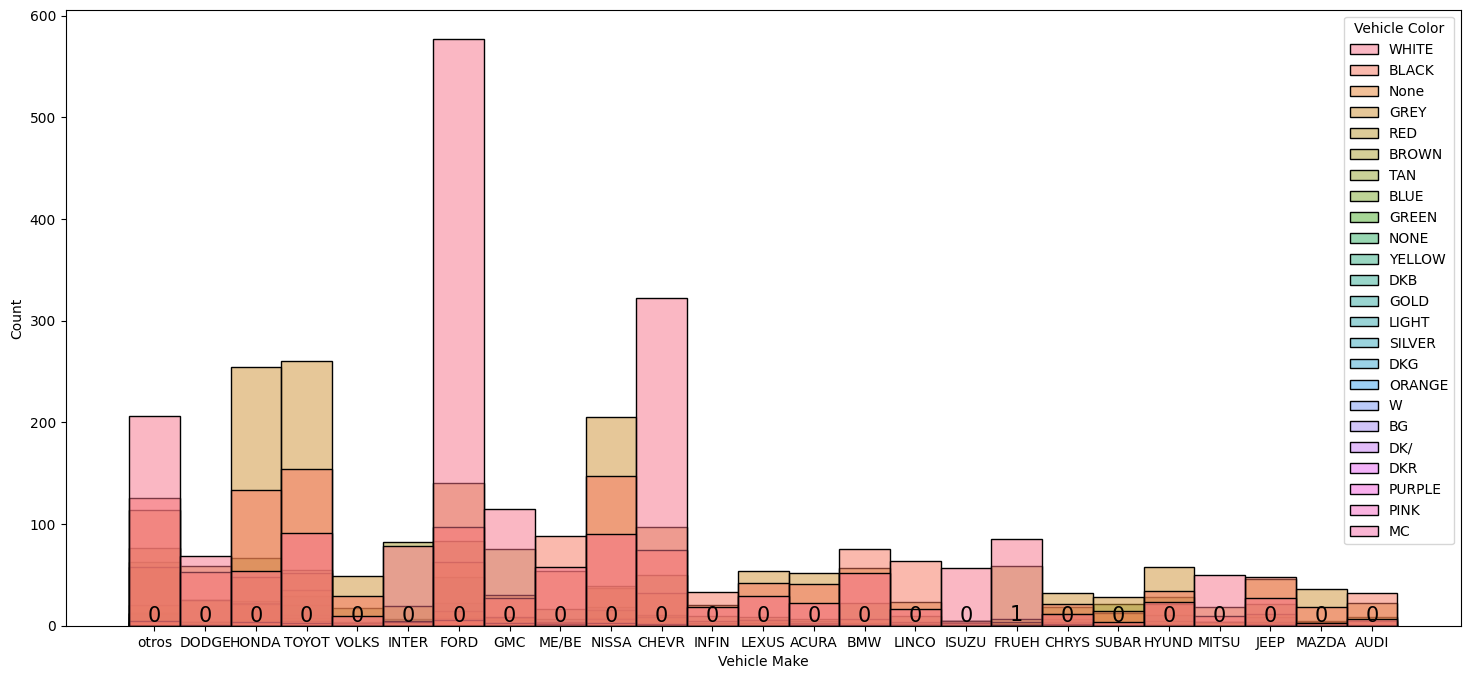

In [ ]:
grupos = df["Vehicle Make"].value_counts().reset_index()
grupos.columns = ["Vehicle Make", "Count"]

plt.figure(figsize=(18, 8))
ax = sns.barplot(data=grupos, x="Vehicle Make", y="Count")
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

plt.show()

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

### J) Visualiza la anterior cuestión (I)

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'